
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 40</p>
## <p style="text-align: center;">Due: Wed, October 4th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

Gaby Lio - gkl239

Shirley Zhu - sxz64

# Question 1 - Bias-variance Trandeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

## Answer

In k-nearest neighbor models, a high value of k leads to high bias and low variance and a low value of K leads to a low bias and a high variance. 

Since k-NN fits a specific point in the data with the N nearest data points in your training set, for a 1-NN this point depends only of 1 single other point. This means, that your model is really close to your training data and therefore the bias is low. In contrast to this the variance in your model is high, because your model is extremely sensitive. 

For example, if you randomly picked a different subset for your training set using a 1-NN would likely change your models predictions dramatically, insinuating there is a very high variance. In contrast, 10-NN would probably give you the same predictions no matter what training set you used, so a higher K means a lower variance. 


# Question 2: Data Exploration and Regression Analysis (4+3+4+4=15pts)

Consider the dataset provided (russett_full_v2.csv) about agricultural inequality, industrial development and political instability in different countries. More information about it can be found [here](https://www.rdocumentation.org/packages/plspm/versions/0.4.9/topics/russett) though the data itself is slightly different than that referenced in the link.

a) (4 points) Generate box-plots of the "rent" (% of farmers that rent all their land), "inst" (measure of political stability in the executive branch), "ecks" (number of violent internal war incidents ) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and identify the cutoff values for outliers. 

Generate 3 scatterplots of "rent" against "demo_score", "inst" against "demo_score" and "ecks" against "demo_score" with the identified outliers colored differently than non-outliers in each; comment on how inclusion of the outliers would affect a predictive model for the "demo_score" response.  

b) (3 points) Let us try to fit an MLR, using ordinary least squares, to this dataset with "demo_score" as the dependent variable using only the predictors 'rent','inst', and 'ecks' . 

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)   

Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

c) (4 points ) Try to predict ”demo_score” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

d) (4 points ) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general? 

## Answer

## PART A

In [54]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
data = pd.read_csv("russett_full_v2.csv")
data.head()

,country,gini,farm,rent,gnpr,labo,inst,ecks,death,demo_class,demo_score
0,Argentina,86.3,98.2,47.9,374,25,16.6,47.0,217,2,35
1,Australia,92.9,99.6,30.0,1215,14,19.3,0.0,0,1,89
2,Austria,74.0,97.4,25.7,532,32,15.8,4.0,0,2,52
3,Belgium,58.7,85.8,98.3,1015,10,23.5,8.0,1,1,98
4,Bolivia,93.8,97.7,35.0,66,72,18.3,43.0,663,3,19


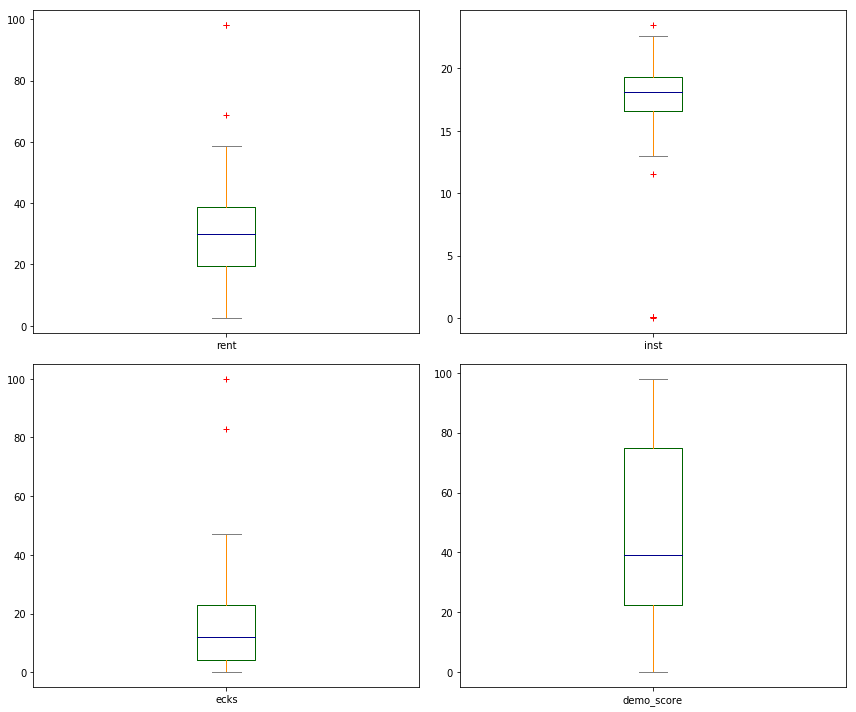

In [56]:
fig = plt.figure(figsize=(12,10))
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
fig.add_subplot(2,2,1)
data['rent'].plot.box(color=color, sym='r+')

fig.add_subplot(2,2,2)
data['inst'].plot.box(color=color, sym='r+')

fig.add_subplot(2,2,3)
data['ecks'].plot.box(color=color, sym='r+')

fig.add_subplot(2,2,4)
data['demo_score'].plot.box(color=color, sym='r+')
plt.tight_layout()
plt.show()

In [57]:
def cacluateoutlier(frame, column):
    df = frame.describe()
    outlier1 =df[column][4] -((df[column][6]- df[column][4])*1.5)
    outlier2 = df[column][6] +((df[column][6]- df[column][4])*1.5)
    return '<1.5 IQR below 1st Q =',round(outlier1),'>1.5 IQR sbove 3rd Q =',round(outlier2)
    
print 'RENT', cacluateoutlier(data, 'rent')
print 'INST', cacluateoutlier(data, 'inst')
print 'ECKS', cacluateoutlier(data, 'ecks')
print 'DEMO_SCORE', cacluateoutlier(data, 'demo_score')

RENT ('<1.5 IQR below 1st Q =', -9.0, '>1.5 IQR sbove 3rd Q =', 68.0)
INST ('<1.5 IQR below 1st Q =', 12.0, '>1.5 IQR sbove 3rd Q =', 23.0)
ECKS ('<1.5 IQR below 1st Q =', -25.0, '>1.5 IQR sbove 3rd Q =', 52.0)
DEMO_SCORE ('<1.5 IQR below 1st Q =', -56.0, '>1.5 IQR sbove 3rd Q =', 154.0)


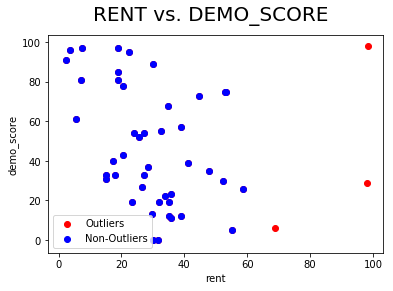

In [58]:
x = data['rent']
y = data['demo_score']
xmasked = x.mask( (x> 68) | (x<-9))
ymasked = y.mask((y>154) | (y<-56))

fig=plt.figure()
fig.suptitle('RENT vs. DEMO_SCORE', fontsize=20)
ax=fig.add_subplot(111)
ax.scatter(x, y, color='red')
ax.scatter(xmasked, ymasked, color='blue')
# plot points outside distribution's width
ax.legend(["Outliers", "Non-Outliers"])
plt.xlabel('rent')
plt.ylabel('demo_score')
plt.show()


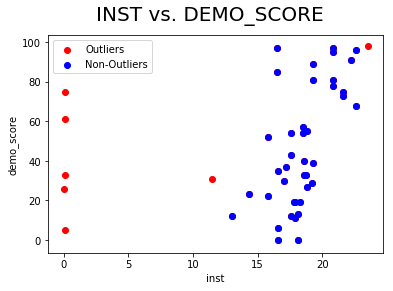

In [59]:
x = data['inst']
y = data['demo_score']
xmasked = x.mask( (x> 23) | (x<12))
ymasked = y.mask((y>154) | (y<-56))

fig=plt.figure()
fig.suptitle('INST vs. DEMO_SCORE', fontsize=20)
ax=fig.add_subplot(111)
ax.scatter(x, y, color='red')
ax.scatter(xmasked, ymasked, color='blue')
# plot points outside distribution's width
ax.legend(["Outliers", "Non-Outliers"])
plt.xlabel('inst')
plt.ylabel('demo_score')
plt.show()

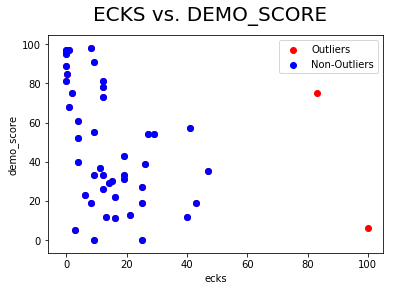

In [60]:
x = data['ecks']
y = data['demo_score']
xmasked = x.mask( (x>52) | (x<-25))
ymasked = y.mask((y>154) | (y<-56))

fig=plt.figure()
fig.suptitle('ECKS vs. DEMO_SCORE', fontsize=20)
ax=fig.add_subplot(111)
ax.scatter(x, y, color='red')
ax.scatter(xmasked, ymasked, color='blue')
# plot points outside distribution's width
ax.legend(["Outliers", "Non-Outliers"])
plt.xlabel('ecks')
plt.ylabel('demo_score')
plt.show()

If we were to predict demo_score using OLS, our results would be affected by the outliers highlighted in the scatter plots above. Since OLS involves minimizing the sum of the squared vertical distances between each data point and the fitted line, if a model is fitted on data containing outliers, the line of best fit will be erroneously pulled towards the outliers and the resulting coefficient estimates will be off. 

## PART B

In [61]:
from sklearn.model_selection import train_test_split

X = data[['rent', 'inst', 'ecks']]
y = data[['demo_score']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)   

In [62]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

lm = linear_model.LinearRegression()
modelsplit = lm.fit(X_train,y_train)

predictionstrain = lm.predict(X_train)
predictions = lm.predict(X_test)

print "The mean squared error for training/training is: " , np.sqrt(mean_squared_error(y_train, predictionstrain))
print "The mean squared error for training/test is: " , np.sqrt(mean_squared_error(y_test, predictions))

The mean squared error for training/training is:  25.781460397
The mean squared error for training/test is:  32.580671803


When we score the model on X_test versus X_Train the root mean squared error increases from 25.7 to 32.5.

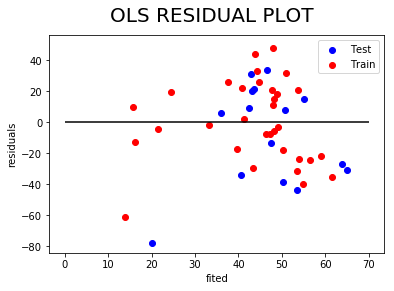

In [63]:
residualstest = (predictions-y_test)
residualstrain = (predictionstrain -y_train)

fig=plt.figure()
fig.suptitle('OLS RESIDUAL PLOT', fontsize=20)
ax=fig.add_subplot(111)
ax.scatter(predictions, residualstest, color='blue')
ax.scatter(predictionstrain, residualstrain, color='red')
# plot points outside distribution's width
ax.legend(["Test", "Train"])
plt.xlabel('fited')
plt.ylabel('residuals')
plt.hlines(y=0, xmin=0, xmax=70)
plt.show()



## PART C

In [64]:
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor, Ridge

In [65]:
from sklearn.model_selection import train_test_split

X = data[['rent', 'inst', 'ecks']]
y = data['demo_score']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=22)   

huber = HuberRegressor(alpha=0.0)
model = huber.fit(X_train, y_train)

predictionshubertrain = huber.predict(X_train)
predictionshubertest = huber.predict(X_test)

print "The mean squared error for training/training is: " , np.sqrt(mean_squared_error(y_train, predictionshubertrain))
print "The mean squared error for training/test is: " , np.sqrt(mean_squared_error(y_test, predictionshubertest))

The mean squared error for training/training is:  26.8358817541
The mean squared error for training/test is:  29.1663802872


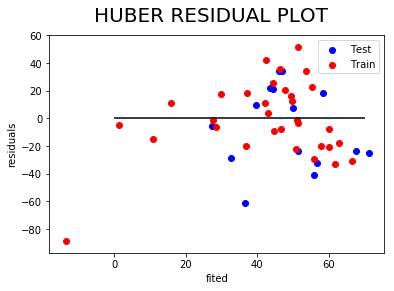

In [66]:
residualshuber = predictionshubertest-y_test
residualshubertrain = (predictionshubertrain-y_train)

fig=plt.figure()
fig.suptitle('HUBER RESIDUAL PLOT', fontsize=20)
ax=fig.add_subplot(111)
ax.scatter(predictionshubertest, residualshuber, color='blue')
ax.scatter(predictionshubertrain, residualshubertrain, color='red')
# plot points outside distribution's width
ax.legend(["Test", "Train"])
plt.xlabel('fited')
plt.ylabel('residuals')
plt.hlines(y=0, xmin=0, xmax=70)
plt.show()


## PART D

Using the Robust Regression with Huber Loss was a better fit for the data since there were so many outliers. The test RMSE was lower when using the Huber Loss in comparison to normal OLS. As you can see from the residual plots above, there is a data point in the bottom left corner of the OLS residual plot for the blue test data, that shows how off the prediction was from the actual target. In the Huber Loss Residual plot, this problem was not as incorrectly predicted (as the residual was less), and all resdiuals look iid. In general, if your data has a lot of outliers, you should be careful when using OLS becuase it will predict most things accurately, but may throw off the prediction for one or two data points. Outliers in OLS will cause the RMSE to be high, and this can be fixed by using the Robost Regression. 

# Question 3 - Sampling (4+4=8pts)

1. NBC has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). NBC wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.10, ε = 0.03 (i.e. your answer will be $\hat{p}$ ± 0.03), what is the minimum value of n needed if true value (i) p = 0.5, (ii) p=0.25? 

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.02. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 2 from the original value, and increasing α to 0.05. In each case how many samples would you need now?

## Answer

$$n=p(1-p)\frac{Z\scriptsize\alpha/2}{\large\epsilon}^2$$ 

#### PART 1
When p = .5 , $\alpha$ = .10 and $\epsilon$ = .03

n = (.5)(1-.5)((1.65/.03)^2)

n = 756.25

When p = .25 , $\alpha$ = .10 and $\epsilon$ = .03

n = (.25)(1-.25)((1.65/.03)^2)

n = 567.1875

#### PART 2
<img src="http://drive.google.com/uc?export=view&id=0B_t7L4-kEPa9R3hPbno1dU45WE0">
So if you change $\alpha$ from .02 to .01 and keep $\epsilon$ the same then your new sample size would be 1000 * (1.226105) = 1226.105.

<img src="http://drive.google.com/uc?export=view&id=0B_t7L4-kEPa9UGFRVHZBclU0dHc">

So if you change $\alpha$ from .02 to .05 and reduce $\epsilon$ by a factor of 2 then the new sample size would be 1000 + 1000 * (1.830481) = 2830.481 .



# Question 4 - Principal Component Analysis (10 points)

Import the diabetes dataset as in Q1 and add the interaction variables.
You should have 65 variables and one target variable.

In [67]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

Next, use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to center and scale each feature as follows.

In [68]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. (3pts)

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively? (3pts)

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively. (This is called Principal Components Regression) Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE). (4pts)

## Answer

## PART A

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components=65)
pca.fit(X)
varex = pca.explained_variance_ratio_
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4))

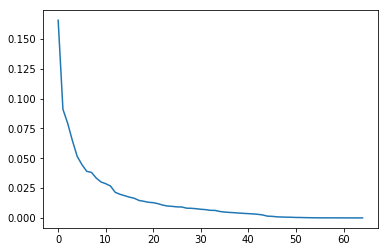

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(varex)

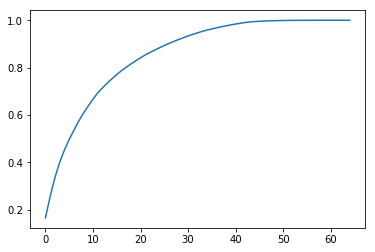

In [72]:
plt.plot(var)

## PART B

In [73]:
def find_closest(A, target):
    #A must be sorted
    idx = A.searchsorted(target)
    idx = np.clip(idx, 1, len(A)-1)
    left = A[idx-1]
    right = A[idx]
    idx -= target - left < right - target
    return idx

var30 = find_closest(var, 0.3) + 1
var60 = find_closest(var, 0.6) + 1
var90 = find_closest(var, 0.9) + 1
print "30% explained with", var30, "components"
print "60% explained with", var60, "components"
print "90% explained with", var90, "components"

30% explained with 3 components
60% explained with 9 components
90% explained with 27 components


## PART C

In [74]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

lm = linear_model.LinearRegression()
model = lm.fit(X_pca,y)

prediction = lm.predict(X_pca)

print "The mean squared error for training/training is: " , (mean_squared_error(y, prediction))
print "The root mean squared error for training/training is: " , np.sqrt(mean_squared_error(y, prediction))

The mean squared error for training/training is:  5120.60554779
The root mean squared error for training/training is:  71.5584065487


In [75]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X)

lm = linear_model.LinearRegression()
model = lm.fit(X_pca,y)

prediction = lm.predict(X_pca)

print "The mean squared error for training/training is: " , (mean_squared_error(y, prediction))
print "The root mean squared error for training/training is: " , np.sqrt(mean_squared_error(y, prediction))

The mean squared error for training/training is:  3942.78675143
The root mean squared error for training/training is:  62.791613703


In [76]:
pca = PCA(n_components=27)
X_pca = pca.fit_transform(X)

lm = linear_model.LinearRegression()
model = lm.fit(X_pca,y)

prediction = lm.predict(X_pca)

print "The mean squared error for training/training is: " , (mean_squared_error(y, prediction))
print "The root mean squared error for training/training is: " , np.sqrt(mean_squared_error(y, prediction))

The mean squared error for training/training is:  2857.425949
The root mean squared error for training/training is:  53.4548963987


As you increase the number of components used in the Linear Regression, the MSE decreases dramatically. The biggest decrease is from N=3 components to N=9 components as the MSE drops from 5120 to 3942. Then when you increase components from N=9 to N=27, the MSE decreases from 3942 to 2857, which is still significant showing that in this case a large amount of components can dramtically reduce the MSE and account for most of the variability in the model.

# Question 5 -  Feature Selection ( 5 points )

Explain what you understand by the two wrapper methods for feature selection (forward and backward selection) (no more than 1 paragraph). 

In wrapper methods wee try to use a subset of features and train a model using them. Based on the inferences we draw from the previous model (test score), we decide to add or remove features from the subset. These methods can be computationally expensive. Forward selection is an iterative method in which we start with having no features in the model. In each iteration, we keep adding the feature which best improves our model until an addition of a new variable does not improve the performance of the model. In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.